<div id="top">
<a href="https://www.kaggle.com/c/titanic"><h1><center>Machine Learning From Disaster - A Kaggle Project</h1></center></a>
*The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. We need to identify the people who were morelikly to survive based on the data provided *
<table><tr>
<td> <img src="files/Titanic Sinks.jpg" alt="Titanic Sinking" style="width: 550px;height:200px"/> </td>
<td> <img src="files/Titanic Sinks1.jpg" alt="People saving their lives" style="width: 550px;height:200px"/> </td>
</tr></table>

<h3><u><i>Project Objective:</h3></u></i><br>
This Project is purely for learning purpose and can be used as a tutorial to learn for a Data Science student. I will be more than happy if someone will learn something from this project. 

<h3><u><i>Technologies and Environment Used</h3></u></i><br>
<table><tr>
<td> <img src="files/Technologies.jpg" alt="Libraries used" style="width: 400px;height:160px"/> </td>
<td> <img src="files/Anaconda.png" alt="Environment" style="width: 250px;height:160px"/> </td>
<td> <img src="files/Jupyter.png" alt="For Writing Code" style="width: 250px;height:160px"/> </td>
</tr></table>

<h3><u><i>Steps to complete the Project</h3></u></i><br>
<ol>
<h4>
<li><a href="#IMP">Importing Data and Libraries</a></li>
<li><a href="#EDA">Exploratary Data Analyses</a><br></li>
<li><a href="#FE">Feature Engineering</a><br></li>
<li><a href="#MB">Building Model</a><br></li>
<li><a href="#ACC">Model Tuning</a><br></li>
<li><a href="#CON">Learnings & Conclusion</a><br></li>
<li><a href="#CRE">Credits & References</a><br></li>
</h4>
</ol>
<center><h3><i>Want to learn more: <a href"https://github.com/vishalgarg1994">https://github.com/vishalgarg1994</a></i></h3><center>
</div>

<div id="IMP">
<h3>1. Importing Data and Libraries</h3>
</div>

In [325]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [285]:
# The data is already split into train and test
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>Dataset columns information </h3>
<i>
    <ol>
        <li><b>PassengerId:</b> Unique ID of every passanger</li>
        <li><b>Survived:</b> This is the target variable having 0 or 1. 1 means Passanger has Survived 0 means Not Survived </li>
        <li><b>Pclass:</b> Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)</li>
        <li><b>Name:</b> Passenger Name</li>
        <li><b>Sex:</b> Male or Female</li>
        <li><b>Age: </b>Passenger's Age</li>
        <li><b>SibSp:</b># of siblings / spouses aboard the Titanic</li>
        <li><b>Parch: </b># of parents / children aboard the Titanic</li>
        <li><b>Ticket:</b>Ticket Number</li>
        <li><b>Fare:</b> Passenger Fare</li>
        <li><b>Cabin:</b>Cabin number</li>
        <li><b>Embarked:</b>Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)(From Where did Passenger Boarded)</li>
    </ol>
</i>
<a href="#top"><h4><p style="text-align:right;">top</p></a>   

<div id="EDA">
<h3>2. Exploratary Data Analyses</h3>
</div>

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
# Checking for nulls
train.isnull().sum()/train.index

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
print("train.shape:{}".format(train.shape))
print("test.shape :{}".format(test.shape))

train.shape:(891, 12)
test.shape :(418, 11)


<h3><i>Analyzing through Visulization</i></h3>

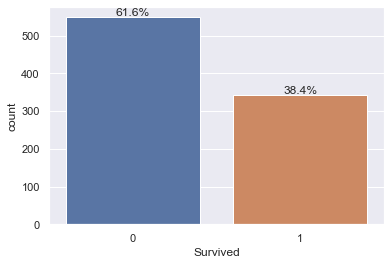

In [22]:
# Variation of target class
sns.set(style='darkgrid')
ncount = len(train.Survived)
ax= sns.countplot(train.Survived)
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')

`Almost two third of the people are died in the tragedy`

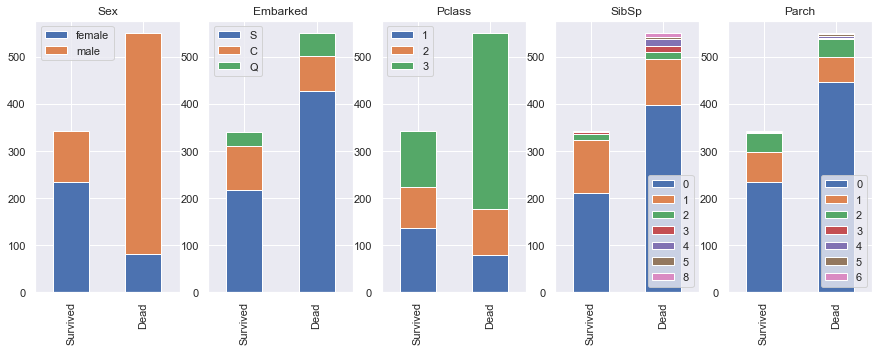

In [57]:
# Now we will see how likely survival is based on different Factors
def cat_bar_chart(feature,num):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(15,5),ax=axes[num%5],title=feature)
    
fig, axes =plt.subplots(1,5)
cols = ['Sex','Embarked','Pclass','SibSp','Parch']
for i,col in enumerate(cols):
    cat_bar_chart(col,i)

<ul>
<li>Females are more likely to survive. <b>We always say that Ladies and Children first,</b> That seems to to be applied here</li>
<li>People from Service class 3 are more likely to die. Here we can interpret like <b>Standard matters</b>. Service class 1 has paid more and has more standard</li>
<li>Rest all Features doesn't seems to have much impact directly</li>    
</ul>

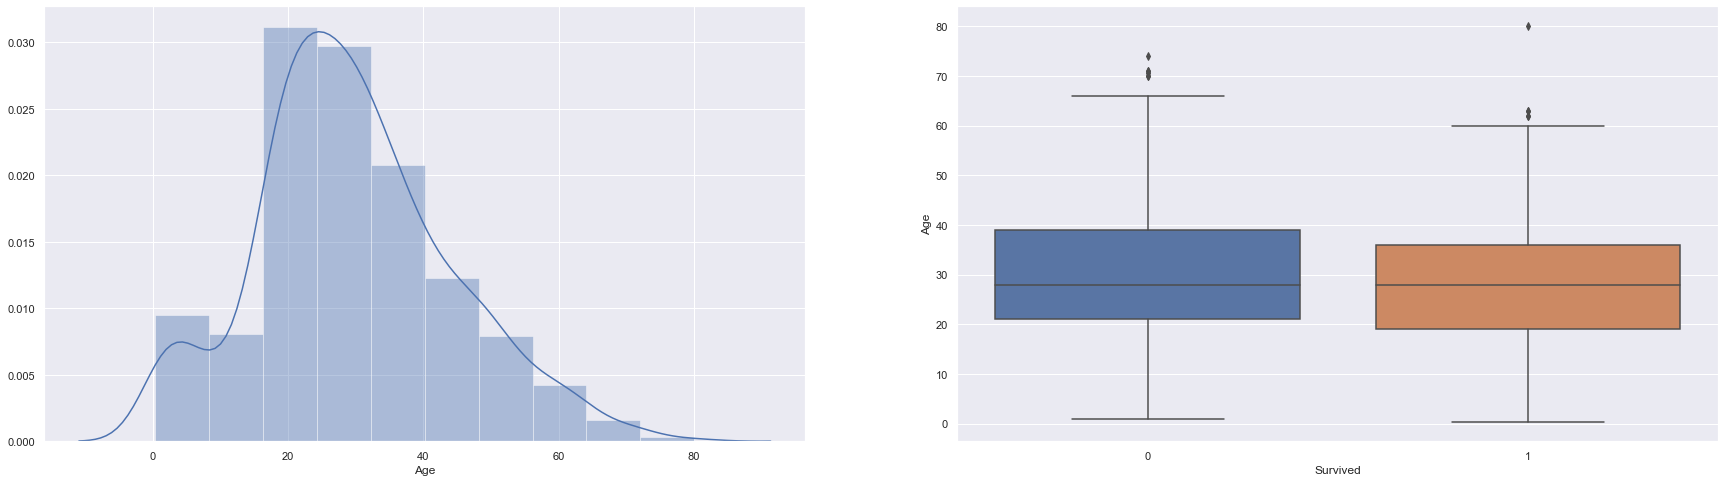

In [80]:
# How Age and Fare are impacting Survival
fig, axes =plt.subplots(1,2, figsize=(30,8))
sns.distplot(train.Age,bins=10,ax=axes[0])
sns.boxplot(x='Survived',y='Age',data=train,ax=axes[1])


[]

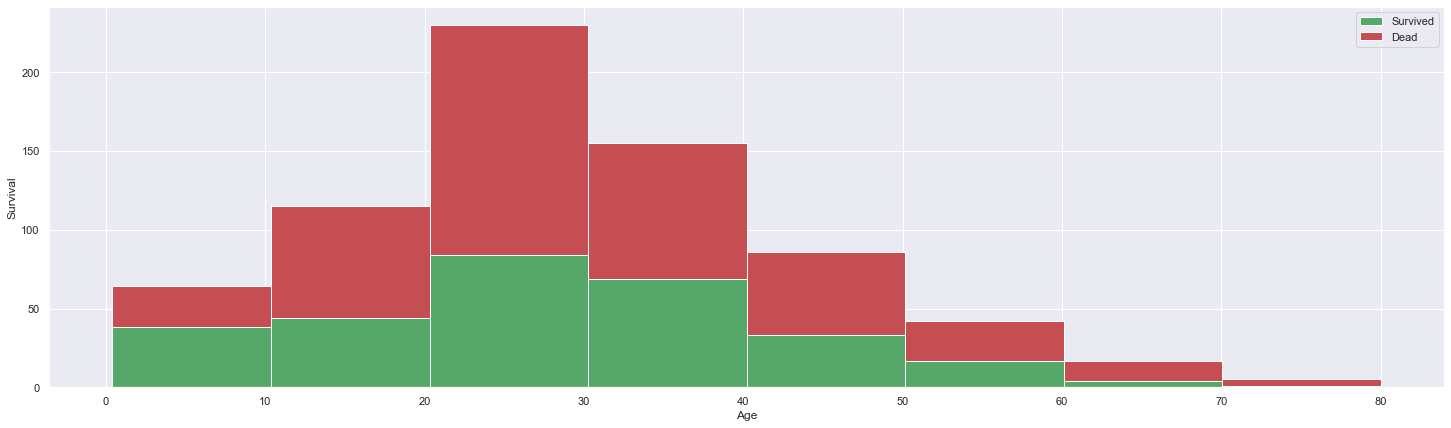

In [97]:
figure = plt.figure(figsize=(25, 7))
plt.hist([train[train['Survived'] == 1]['Age'], train[train['Survived'] == 0]['Age']], 
         stacked=True, color = ['g','r'],
         bins = 8, label = ['Survived','Dead'])
plt.legend()
plt.xlabel('Age')
plt.ylabel('Survival')
plt.plot()

<ul>
    <li>Childerns are more likely to survive</li>
    <li>Peoples from 70-80 are having less chanceof Survival</li>
    <li>B/w 10 to 70 Age,it is almost equally distributed for survival</li>
</ul>

[]

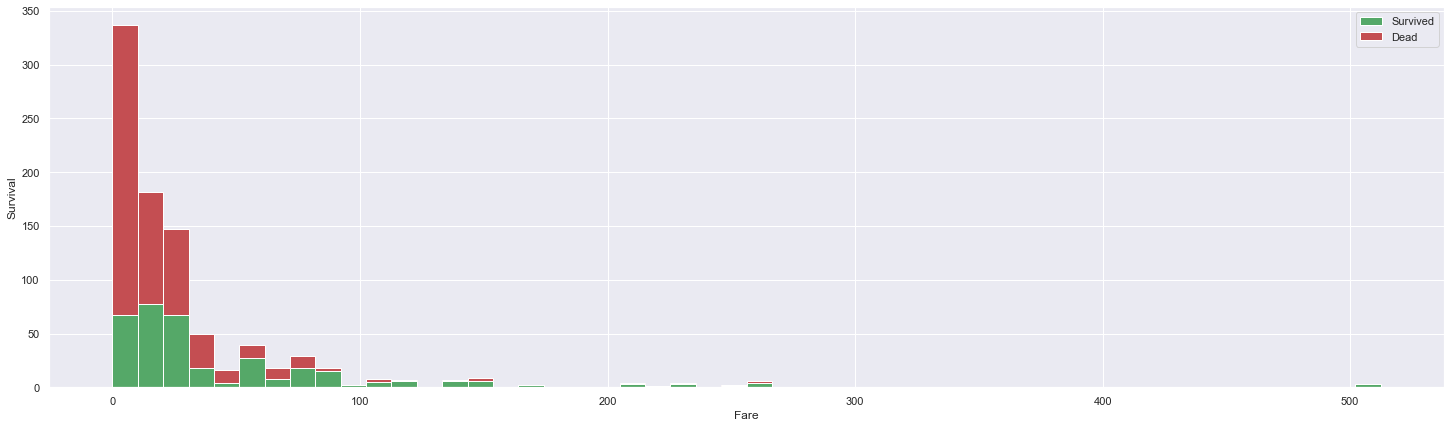

In [96]:
figure = plt.figure(figsize=(25, 7))
plt.hist([train[train['Survived'] == 1]['Fare'], train[train['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Survival')
plt.plot()

* People having cheaper tickets are more likely to die.Again, whosoever paid more having more standard and more likely to survive.

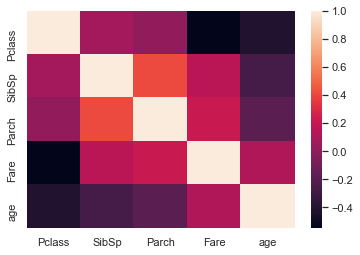

In [322]:
sns.heatmap(train.corr())

<a href="#top"><h4><p style="text-align:right;">top</p></a>   

<div id="FE">
<h3>3. Feature Engineering</h3>
</div>

removing Unwanted columns

In [286]:
cols = ['PassengerId','Cabin','Ticket']
train.drop(cols,inplace=True,axis=1)
test.drop(cols,inplace=True,axis=1)

In [102]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Processing name column

In [287]:

degree = set()
for name in train.Name:
    degree.add(name.split(',')[1].split('.')[0].strip())
print(degree)
train['Title'] = train.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())
test['Title'] = test.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())

{'the Countess', 'Ms', 'Mr', 'Rev', 'Dr', 'Col', 'Sir', 'Don', 'Mrs', 'Master', 'Mlle', 'Jonkheer', 'Mme', 'Lady', 'Capt', 'Major', 'Miss'}


In [128]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [288]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
train.Title = train.Title.map(Title_Dictionary)
test.Title = test.Title.map(Title_Dictionary)

In [132]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


### Processing Age Column

* Get the Median Age base on 'Sex','Pclass','Title'
* Fill the missing values using this table

In [289]:
df_age_fill = train.groupby(['Sex','Pclass','Title'])['Age'].median().reset_index()

In [290]:
def fill_age(row):
    condition = (
        (df_age_fill['Sex'] == row['Sex']) & 
        (df_age_fill['Title'] == row['Title']) & 
        (df_age_fill['Pclass'] == row['Pclass'])
    ) 
    return df_age_fill[condition]['Age'].values[0]



train['age'] = train.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
test['age'] = test.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
train.drop(['Age','Name'],inplace=True,axis=1)
test.drop(['Age','Name'],inplace=True,axis=1)

In [171]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age
0,0,3,male,1,0,7.2500,S,Mr,22.0
1,1,1,female,1,0,71.2833,C,Mrs,38.0
2,1,3,female,0,0,7.9250,S,Miss,26.0
3,1,1,female,1,0,53.1000,S,Mrs,35.0
4,0,3,male,0,0,8.0500,S,Mr,35.0


### Processing other Null values

* Since there are only 1 or 2 nulls left, we can replace them with median or mode

In [179]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
age         0
dtype: int64

In [291]:
value_to_fill = train['Embarked'].dropna().mode().to_string(index=False).strip()
train['Embarked'] = train.Embarked.fillna(value_to_fill)

In [207]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
age         0
dtype: int64

In [208]:
test.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        1
Embarked    0
Title       1
age         0
dtype: int64

In [292]:
test.Fare = test.Fare.fillna(test.Fare.dropna().median())

In [210]:
test.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       1
age         0
dtype: int64

In [293]:
value_to_fill = test['Title'].dropna().mode().to_string(index=False).strip()
test['Title'] = test.Title.fillna(value_to_fill)

In [214]:
test.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
age         0
dtype: int64

In [217]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age
0,0,3,male,1,0,7.2500,S,Mr,22.0
1,1,1,female,1,0,71.2833,C,Mrs,38.0
2,1,3,female,0,0,7.9250,S,Miss,26.0
3,1,1,female,1,0,53.1000,S,Mrs,35.0
4,0,3,male,0,0,8.0500,S,Mr,35.0


### Labeling 'Embarked' , 'Title' , 'Sex' columns

In [294]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age
0,0,3,male,1,0,7.2500,S,Mr,22.0
1,1,1,female,1,0,71.2833,C,Mrs,38.0
2,1,3,female,0,0,7.9250,S,Miss,26.0
3,1,1,female,1,0,53.1000,S,Mrs,35.0
4,0,3,male,0,0,8.0500,S,Mr,35.0


In [295]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age
0,3,male,0,0,7.8292,Q,Mr,34.5
1,3,female,1,0,7.0000,S,Mrs,47.0
2,2,male,0,0,9.6875,Q,Mr,62.0
3,3,male,0,0,8.6625,S,Mr,27.0
4,3,female,1,1,12.2875,S,Mrs,22.0


In [296]:
print(train.Title.value_counts())
print(test.Title.value_counts())

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64
Mr         241
Miss        78
Mrs         73
Master      21
Officer      5
Name: Title, dtype: int64


* Since test is not having Royality column so we first need to combine and then label it

In [297]:
y = train.pop('Survived')

In [298]:
print(train.shape,test.shape)

(891, 8) (418, 8)


In [299]:
fullds= pd.concat([train,test],axis=0)

In [301]:
fullds.reset_index(inplace=True,drop=True)

In [302]:
fullds.shape

(1309, 8)

In [303]:
fullds.tail()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age
1304,3,male,0,0,8.0500,S,Mr,26.0
1305,1,female,0,0,108.9000,C,Mr,39.0
1306,3,male,0,0,7.2500,S,Mr,38.5
1307,3,male,0,0,8.0500,S,Mr,26.0
1308,3,male,1,1,22.3583,C,Master,4.0


In [304]:
fullds = pd.get_dummies(fullds,drop_first=True)

In [308]:
train_X = fullds[0:891:]
test_X = fullds[891::]

In [310]:
print(train_X.shape)
print(test_X.shape)

(891, 13)
(418, 13)


In [313]:
train_X.tail()

,Pclass,SibSp,Parch,Fare,age,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
886,2,0,0,13.00,27.0,1,0,1,0,0,0,1,0
887,1,0,0,30.00,19.0,0,0,1,1,0,0,0,0
888,3,1,2,23.45,18.0,0,0,1,1,0,0,0,0
889,1,0,0,30.00,26.0,1,0,0,0,1,0,0,0
890,3,0,0,7.75,32.0,1,1,0,0,1,0,0,0


In [315]:
test_X.reset_index(drop=True,inplace=True)

In [316]:
test_X.tail()

,Pclass,SibSp,Parch,Fare,age,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
413,3,0,0,8.0500,26.0,1,0,1,0,1,0,0,0
414,1,0,0,108.9000,39.0,0,0,0,0,1,0,0,0
415,3,0,0,7.2500,38.5,1,0,1,0,1,0,0,0
416,3,0,0,8.0500,26.0,1,0,1,0,1,0,0,0
417,3,1,1,22.3583,4.0,1,0,0,0,0,0,0,0


In [411]:
y.shape

(891,)

<a href="#top"><h4><p style="text-align:right;">top</p></a>   

<div id="MB">
<h3>4. Model Building</h3>
</div>

 * Logistic Regression

In [340]:
models = ['Logistic_Regression','SVM','Decision_Tree','Random_Forest','Adaboost','Gradient_Boost']

In [397]:
accuracy = []
lr = LogisticRegression()
lr.fit(train_X,y)
accuracy.append(metrics.accuracy_score(y,lr.predict(train_X)))
svm = SVC()
svm.fit(train_X,y)
accuracy.append(metrics.accuracy_score(y,svm.predict(train_X)))
dt = DecisionTreeClassifier()
dt.fit(train_X,y)
accuracy.append(metrics.accuracy_score(y,dt.predict(train_X)))
rf = RandomForestClassifier()
rf.fit(train_X,y)
accuracy.append(metrics.accuracy_score(y,rf.predict(train_X)))
abc = AdaBoostClassifier()
abc.fit(train_X,y)
accuracy.append(metrics.accuracy_score(y,abc.predict(train_X)))
gbc = GradientBoostingClassifier()
gbc.fit(train_X,y)
accuracy.append(metrics.accuracy_score(y,gbc.predict(train_X)))

In [398]:
for x,z in zip(models,accuracy):
    print(x,z)

Logistic_Regression 0.8282828282828283
SVM 0.6846240179573513
Decision_Tree 0.9842873176206509
Random_Forest 0.9842873176206509
Adaboost 0.8473625140291807
Gradient_Boost 0.9034792368125701


1. If we see in the intitial trends, SVC is giving comparatively less accuracy
2. Random Forest and Decision Tree are giving pretty good results,may be they have overfitted 
3. Lets generate the output csv file of every model and try to upload on Kaggle and see which performs good afterwards we can 
   imrove using other techniques.

In [399]:
test_S = pd.read_csv('test.csv')
output = pd.DataFrame(test_S['PassengerId'],columns=['PassengerId'])
output.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [400]:
output['Survived'] = lr.predict(test_X)
output.to_csv('LogisticRegression',index=False)
output['Survived'] = svm.predict(test_X)
output.to_csv('SVM',index=False)
output['Survived'] = dt.predict(test_X)
output.to_csv('DecisionTreeClassifier',index=False)
output['Survived'] = rf.predict(test_X)
output.to_csv('RandomForestClassifier',index=False)
output['Survived'] = abc.predict(test_X)
output.to_csv('AdaBoostClassifier',index=False)
output['Survived'] = gbc.predict(test_X)
output.to_csv('GradientBoostingClassifier',index=False)

In [402]:
kaggle_accuracy = [0.77,0.67,0.70,0.74,0.75,0.77]
for i in range(0,6):
    print(models[i].ljust(20),round(accuracy[i],3),kaggle_accuracy[i])

Logistic_Regression  0.828 0.77
SVM                  0.685 0.67
Decision_Tree        0.984 0.7
Random_Forest        0.984 0.74
Adaboost             0.847 0.75
Gradient_Boost       0.903 0.77


<ul>
<li><i>It is quite clear from the above output that Random Forest,Gradient Boosting and Decision tree are overfitting.So we need to tweak the parameters to stop growing the tree after a certain level</i><br></li>
<li> Logistic Regression is quite ok w.r.t test accuracy</li>
<li> For the time being,we can ignore SVM and can concentrate over other ensemble models </li>
</ul>
<a href="#top"><h4><p style="text-align:right;">top</p></a>   

<div id="ACC">
<h3>5. Model Tuning</h3>
</div>

* Tuning Random Forest 

In [374]:
folds = KFold(n_splits=5,shuffle=True,random_state=7)

rf = RandomForestClassifier()
hyper_params_rf = [{
    'n_estimators':[10,50,100,500],
    'min_samples_split':[2,3,4,5],
    'max_depth':[2,5,7,100]
}]
model_rf = GridSearchCV(estimator=rf,
                       param_grid = hyper_params_rf,
                       scoring ='accuracy',
                       cv = folds,
                       verbose=1,
                       return_train_score=True,
                       n_jobs=16)
model_rf.fit(train_X,y)
model_rf.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:  1.3min
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:  1.9min
[Parallel(n_jobs=16)]: Done 320 out of 320 | elapsed:  2.5min finished


{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}

In [408]:
rf = RandomForestClassifier(n_estimators=100,max_depth=5)
rf.fit(train_X,y)
print(metrics.accuracy_score(y,rf.predict(train_X)))

0.8439955106621774


`Above model gave accuracy of more than 78% on Kaggle.So we made a good improvement`

In [393]:
gb = GradientBoostingClassifier()
hyper_params_gb = [{
    'n_estimators':[10,50,100,200,500,1000],
    'learning_rate':[0.1,0.3,0.6,0.75],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2]
}]
model_gb = GridSearchCV(estimator=gb,
                       param_grid = hyper_params_gb,
                       scoring ='accuracy',
                       cv = 2,
                       verbose=1,
                       return_train_score=True,
                       n_jobs=16)
model_gb.fit(train_X,y)
model_gb.best_params_

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   29.7s
[Parallel(n_jobs=16)]: Done 192 out of 192 | elapsed:  1.3min finished


{'learning_rate': 0.3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

<a href="#top"><h4><p style="text-align:right;">top</p></a>   

<div id="CON">
<h3>6. Learnings & Conclusion</h3>
</div>

<ul>
   <li>If you are having small dataset,use cross Fold.You shouldn't split the data into train and test,else model learning will be impacted inversely</li> 
    <li>You always have to take care of Data Leakage</li>
    <li>Feature Engineering is the most important step followed by Model Tuning</li>
    <li>It would be very helpful if you are having domain knowledge.So you can perform Feature Engineering in much better way</li>
</ul>

<div id="CRE">
<h3>7. Credits & References</h3>
</div>
<a href="https://github.com/ahmedbesbes/How-to-score-0.8134-in-Titanic-Kaggle-Challenge/blob/master/article_1.ipynb">
Feature Engineering for Name and Age Features </a><br>
<a href = "https://www.kaggle.com/c/titanic/">Project Link</a>
<a href="#top"><h4><p style="text-align:right;">top</p></a> 
<p><center><h2>Thanks!!! <h2></center><p>